# *Organización de datos 75.06/ 95.58*

#  Trabajo práctico 1

# Análisis exploratorio de datos 

**Segundo cuatrimestre del 2020**

Compu_Datos

Apellido y nombre    | Padrón

Alejandro Balladares | 101118

Nicolas Nieva | 101067

Omar Fernandez 81006

# 1 Introducción

El objetivo principal del análisis exploratorio de datos permite comprender las mejor las características de un conjunto de datos. Es imprescindible detectar patrones, relaciones, tendencias, valores comunes, valores atípicos que nos permitan comprender la naturaleza de estos.  Para esto se requieren herramientas que nos permita visualizar,  analizar y formular hipótesis.

# 2. Analisis general
En esta sección se realizará la importación del set  datos, un muestreo preliminar, estructura y datos faltantes. 

## 2.1 Importación de datos y análisis preliminar
Se dispone de un archivo csv que nos brinda información sobre distintos tweets. Cada línea del archivo nos da información sobre un tweet en particular. Se realiza la lectura de los datos y se muestra una vista rápida para poder familiarizarnos con la información incluida en el archivo. Para ello usando el método head()  mostramos los primeros cinco registros.

In [213]:
#importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
plt.rcParams['figure.figsize'] = (20, 10)
sns.set(style="whitegrid") # seteando tipo de grid en seaborn
pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

from IPython.core.pylabtools import figsize
plt.rcParams['figure.figsize'] = (20, 10)


In [214]:
df = pd.read_csv('train.csv')
df.head()

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
0,27761,EMEA,None,1,1,1,1,0,Bureaucratic_Code_4,6/16/2015,...,Q2,2016,NaT,10,EUR,"5,272,800.00",EUR,"5,272,800.00",Closed Lost,Prod_Category_A_None
1,27760,EMEA,None,0,0,0,0,0,Bureaucratic_Code_4,6/16/2015,...,Q1,2016,NaT,0,EUR,"48,230.00",EUR,"48,230.00",Closed Won,Prod_Category_A_None
2,27446,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,4/21/2015,...,Q1,2016,NaT,0,USD,"83,865.60",USD,"83,865.60",Closed Won,Prod_Category_A_None
3,16808,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,Q1,2018,NaT,14,USD,"7,421,881.50",USD,"7,421,881.50",Closed Lost,Prod_Category_A_None
4,16805,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,Q1,2018,NaT,25,USD,"13,357,192.50",USD,"13,357,192.50",Closed Lost,Prod_Category_A_None


In [215]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16947 entries, 0 to 16946
Data columns (total 52 columns):
ID                                    16947 non-null int64
Region                                16947 non-null object
Territory                             16947 non-null object
Pricing, Delivery_Terms_Quote_Appr    16947 non-null int64
Pricing, Delivery_Terms_Approved      16947 non-null int64
Bureaucratic_Code_0_Approval          16947 non-null int64
Bureaucratic_Code_0_Approved          16947 non-null int64
Submitted_for_Approval                16947 non-null int64
Bureaucratic_Code                     16947 non-null object
Account_Created_Date                  16947 non-null object
Source                                16947 non-null object
Billing_Country                       16947 non-null object
Account_Name                          16947 non-null object
Opportunity_Name                      16947 non-null object
Opportunity_ID                        16947 non-null int6

In [216]:
df.describe()

,ID,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Opportunity_ID,ASP,ASP_(converted),Delivery_Year,TRF,Total_Amount,Total_Taxable_Amount
count,"16,947.00","16,947.00","16,947.00","16,947.00","16,947.00","16,947.00","16,947.00","13,738.00","13,738.00","16,947.00","16,947.00","16,888.00","16,947.00"
mean,"17,666.65",0.81,0.58,0.48,0.32,0.00,"5,335.94",7.01,0.43,"2,017.14",2.34,"1,993,659.22","3,224,116.79"
std,"6,940.86",0.39,0.49,0.50,0.47,0.00,"3,324.72",18.86,0.76,0.83,12.17,"18,484,259.88","20,303,604.73"
min,"4,854.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"2,016.00",0.00,0.00,0.00
25%,"11,953.00",1.00,0.00,0.00,0.00,0.00,"2,448.50",0.36,0.37,"2,016.00",0.00,"26,775.00","85,465.80"
50%,"18,114.00",1.00,1.00,0.00,0.00,0.00,"5,306.00",0.40,0.41,"2,017.00",0.00,"107,250.00","376,067.25"
75%,"23,845.50",1.00,1.00,1.00,1.00,0.00,"7,698.00",0.51,0.48,"2,018.00",1.00,"460,389.83","1,037,450.00"
max,"28,773.00",1.00,1.00,1.00,1.00,0.00,"12,803.00",80.00,67.00,"2,020.00",500.00,"1,320,000,000.00","1,356,338,620.00"


## 2.2 Datos faltantes en el Dataframe

No todo registro del Dataframe posee información en todos sus campos. Nos interesa saber la cantidad de datos faltantes en cada columna del DataFrame. Se procedió a hacer un conteo de la cantidad de datos nulos y comparar usando el total de datos.

###  2.2.1 Datos faltantes por columna

No todo registro del Dataframe posee información en todos sus campos. Nos interesa saber la cantidad de datos faltantes en cada columna del DataFrame. Se procedió a hacer un conteo de la cantidad de datos nulos y comparar usando el total de datos

In [217]:
columnas = ['ID','Region','Territory', 'Pricing, Delivery_Terms_Quote_Appr','Pricing, Delivery_Terms_Approved',
            'Bureaucratic_Code_0_Approval','Bureaucratic_Code_0_Approved', 'Submitted_for_Approval',
            'Bureaucratic_Code','Account_Created_Date',
            #'Source',
            'Billing_Country', 'Account_Name',
            'Opportunity_Name', 'Opportunity_ID', 'Sales_Contract_No', 'Account_Owner', 'Opportunity_Owner',
            'Account_Type', 'Opportunity_Type', 'Quote_Type', 'Delivery_Terms', 'Opportunity_Created_Date',
            'Brand', 'Product_Type','Size', 'Product_Category_B', 'Price','Currency','Last_Activity',
            'Quote_Expiry_Date','Last_Modified_Date','Last_Modified_By','Product_Family','Product_Name',
            'ASP_Currency','ASP','ASP_(converted)_Currency','ASP_(converted)','Planned_Delivery_Start_Date',
            'Planned_Delivery_End_Date','Month','Delivery_Quarter','Delivery_Year','Actual_Delivery_Date',
            'TRF','Total_Amount_Currency','Total_Amount', 'Total_Taxable_Amount_Currency','Total_Taxable_Amount',
            'Stage','Prod_Category_A']

nulls = pd.DataFrame(df[columnas].isnull().sum().sort_values(), columns=['nulls'])
nulls['porcentaje'] = round(100*nulls['nulls'] / len(df), 2)
nulls = nulls.reset_index()
nulls = nulls.nlargest(10, 'nulls')
nulls
#puse 10 porque de la totalidad de las columnas, solo 3 tienen nulls, si quieren mostrar el resto, pueden hacerlo
#No hay muchos nulls pero la columna "Price" está llena de valores "None" cuando deberían ser numeros, anda a saber
#si las otras columnas tienen problemas similares

,index,nulls,porcentaje
49,ASP,3209,18.94
50,ASP_(converted),3209,18.94
48,Total_Amount,59,0.35
0,ID,0,0.00
1,Price,0,0.00
2,Currency,0,0.00
3,Last_Activity,0,0.00
4,Quote_Expiry_Date,0,0.00
5,Last_Modified_Date,0,0.00
6,Last_Modified_By,0,0.00


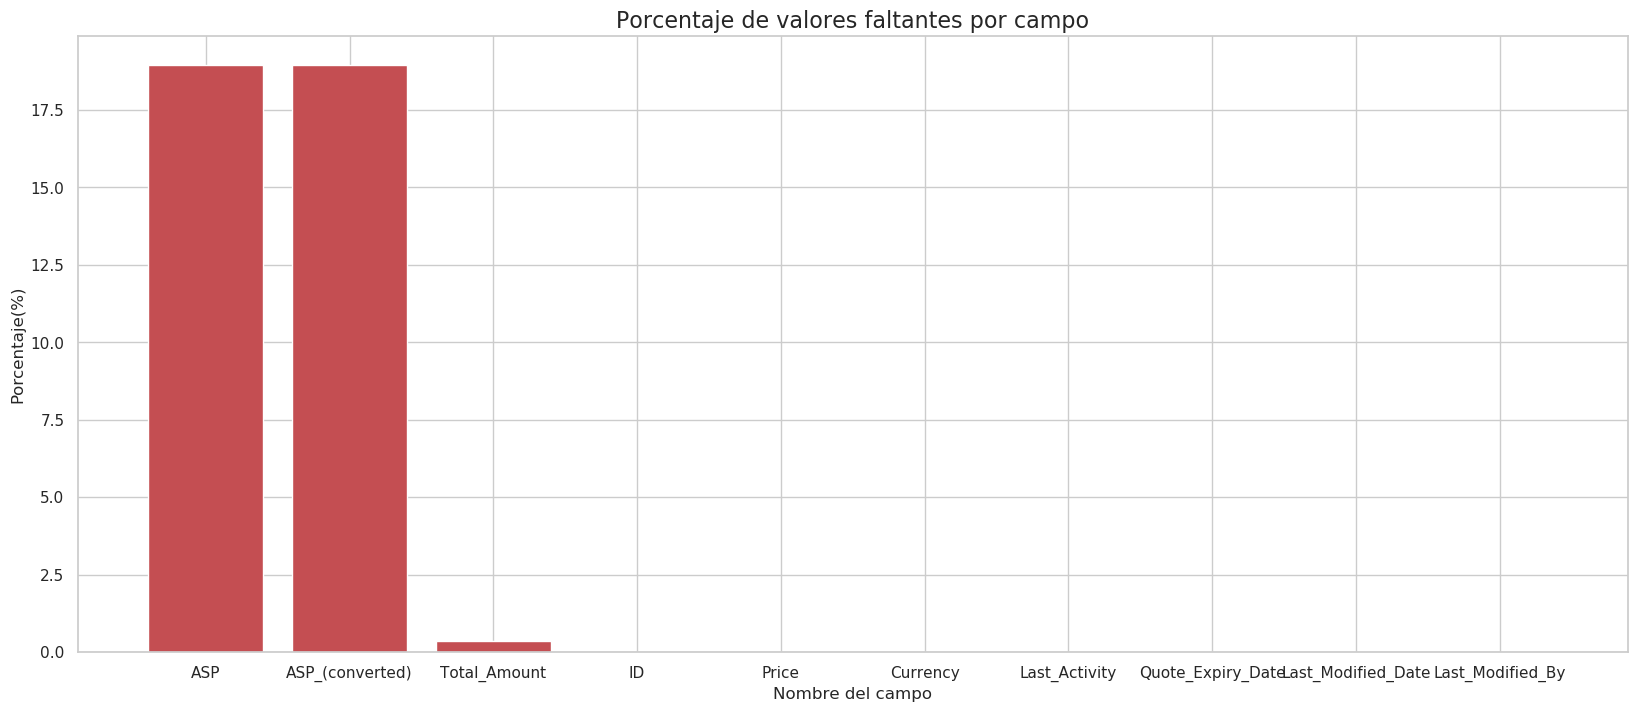

In [218]:
# Tamaño
plt.figure(figsize=(20,8))
# Título
plt.title('Porcentaje de valores faltantes por campo', fontsize=16)
# Eje X
plt.xlabel('Nombre del campo')
# Eje Y
plt.ylabel('Porcentaje(%)')
plt.bar(height=nulls["porcentaje"], x=nulls["index"], color='C3')

plt.show()

## Analisis de región

Descripción : Región de la oportunidad 

Text(0, 0.5, 'Cantidad de apariciones')

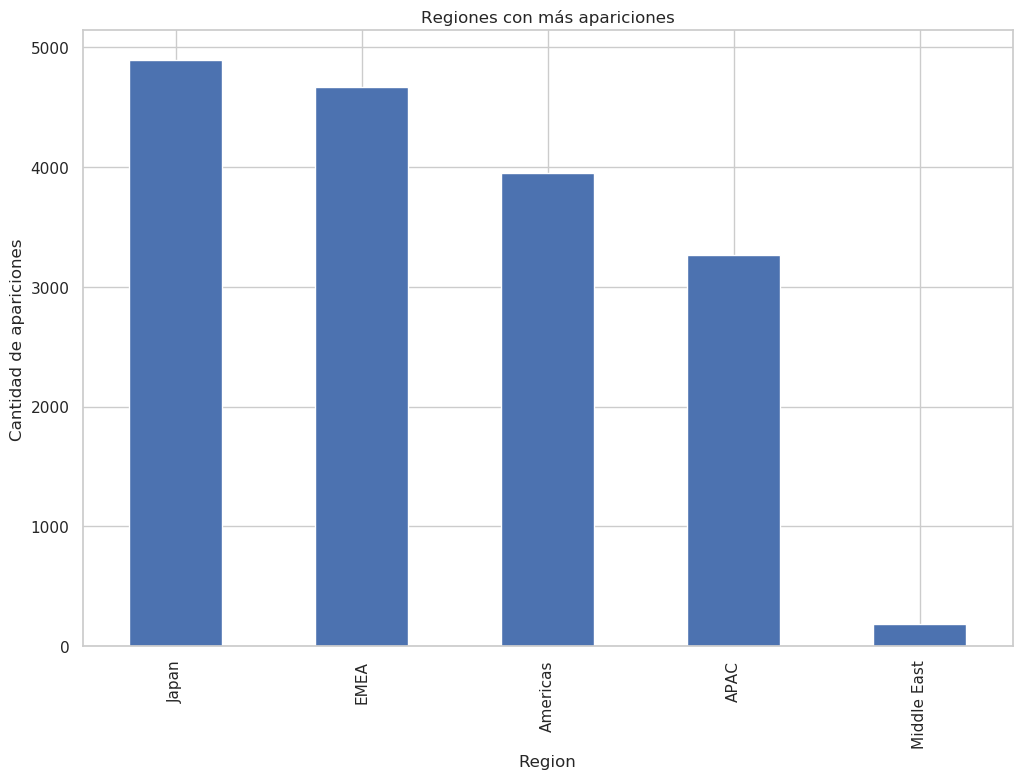

In [219]:
region = pd.DataFrame(df['Region'].value_counts())
region.columns = ['cantidad']

region["cantidad"].plot(kind="bar",title = 'Regiones con más apariciones' , figsize=(12,8))
plt.xlabel('Region', fontsize= 12)
plt.ylabel("Cantidad de apariciones", fontsize= 12)

<Figure size 100x100 with 0 Axes>

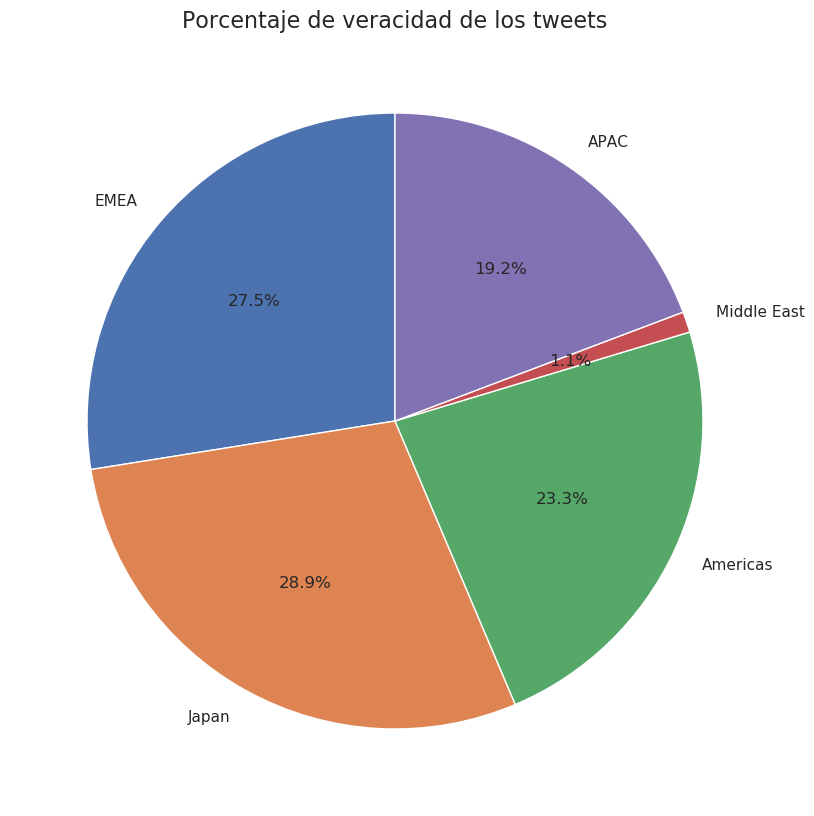

In [220]:
emea = df[df['Region'] == 'EMEA']
americas = df[df['Region'] == 'Americas']
apac = df[df['Region'] == 'APAC']
japan = df[df['Region'] == 'Japan']
me = df[df['Region'] == 'Middle East']

cant_emea = emea['Region'].count()
cant_americas = americas['Region'].count()
cant_japan = japan['Region'].count()
cant_me = me['Region'].count()
cant_apac = apac['Region'].count()

# Tamaño
plt.figure(figsize=(1,1))
fig1, ax1 = plt.subplots()
ax1.pie([cant_emea, cant_japan, cant_americas, cant_me, cant_apac], labels=['EMEA',
                'Japan','Americas','Middle East','APAC'], autopct='%1.1f%%', shadow=False, startangle=90)
plt.title("Porcentaje de veracidad de los tweets", fontsize=16)
plt.show()

EMEA = Europa, oriente medio y Africa.

pero por otro lado también tenemos a oriente medio por separado

## Analisis del Stage por región

In [221]:
stage = df.groupby(['Region','Stage']).agg({'Stage': 'count'})
stage.columns = ['cantidad']
stage = stage.reset_index()
stage = stage.pivot(index='Region',columns='Stage',values='cantidad')
stage.fillna(value=0, inplace=True)
stage

Stage,Closed Lost,Closed Won,Negotiation,Proposal,Qualification
Region,,,,,
APAC,"1,355.00","1,896.00",0.00,8.00,3.00
Americas,"2,140.00","1,793.00",8.00,4.00,0.00
EMEA,"2,189.00","2,471.00",1.00,3.00,0.00
Japan,"1,546.00","3,323.00",1.00,14.00,8.00
Middle East,120.00,50.00,8.00,6.00,0.00


Text(216.25, 0.5, 'Region')

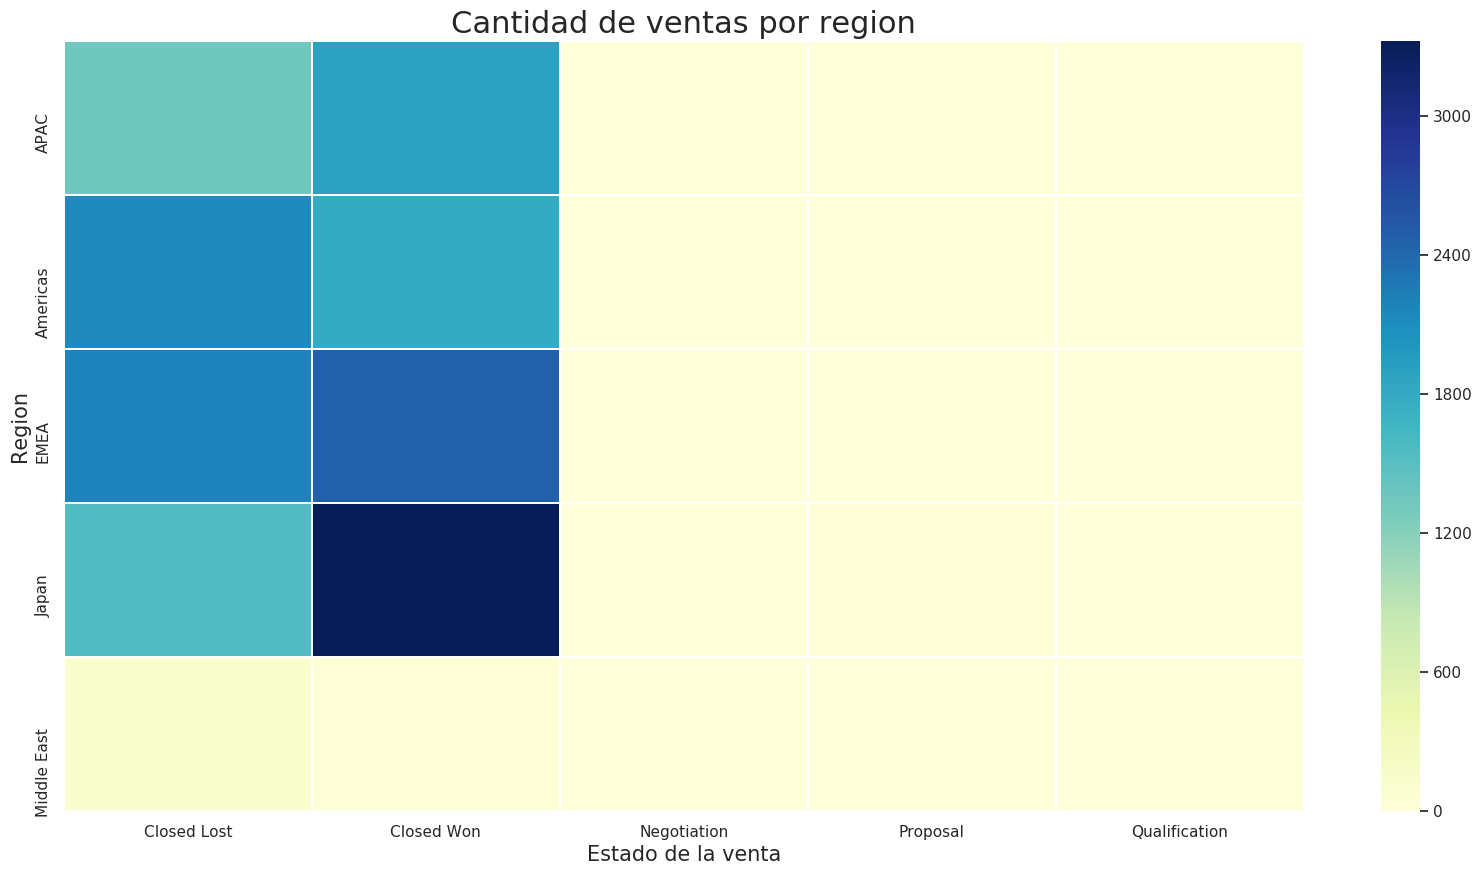

In [222]:
g = sns.heatmap(stage, linewidths=.5, cmap="YlGnBu") # annot=True
g.set_title("Cantidad de ventas por region", fontsize=22)
g.set_xlabel("Estado de la venta",fontsize=15)
g.set_ylabel("Region", fontsize=15) #no me gusta como quedó

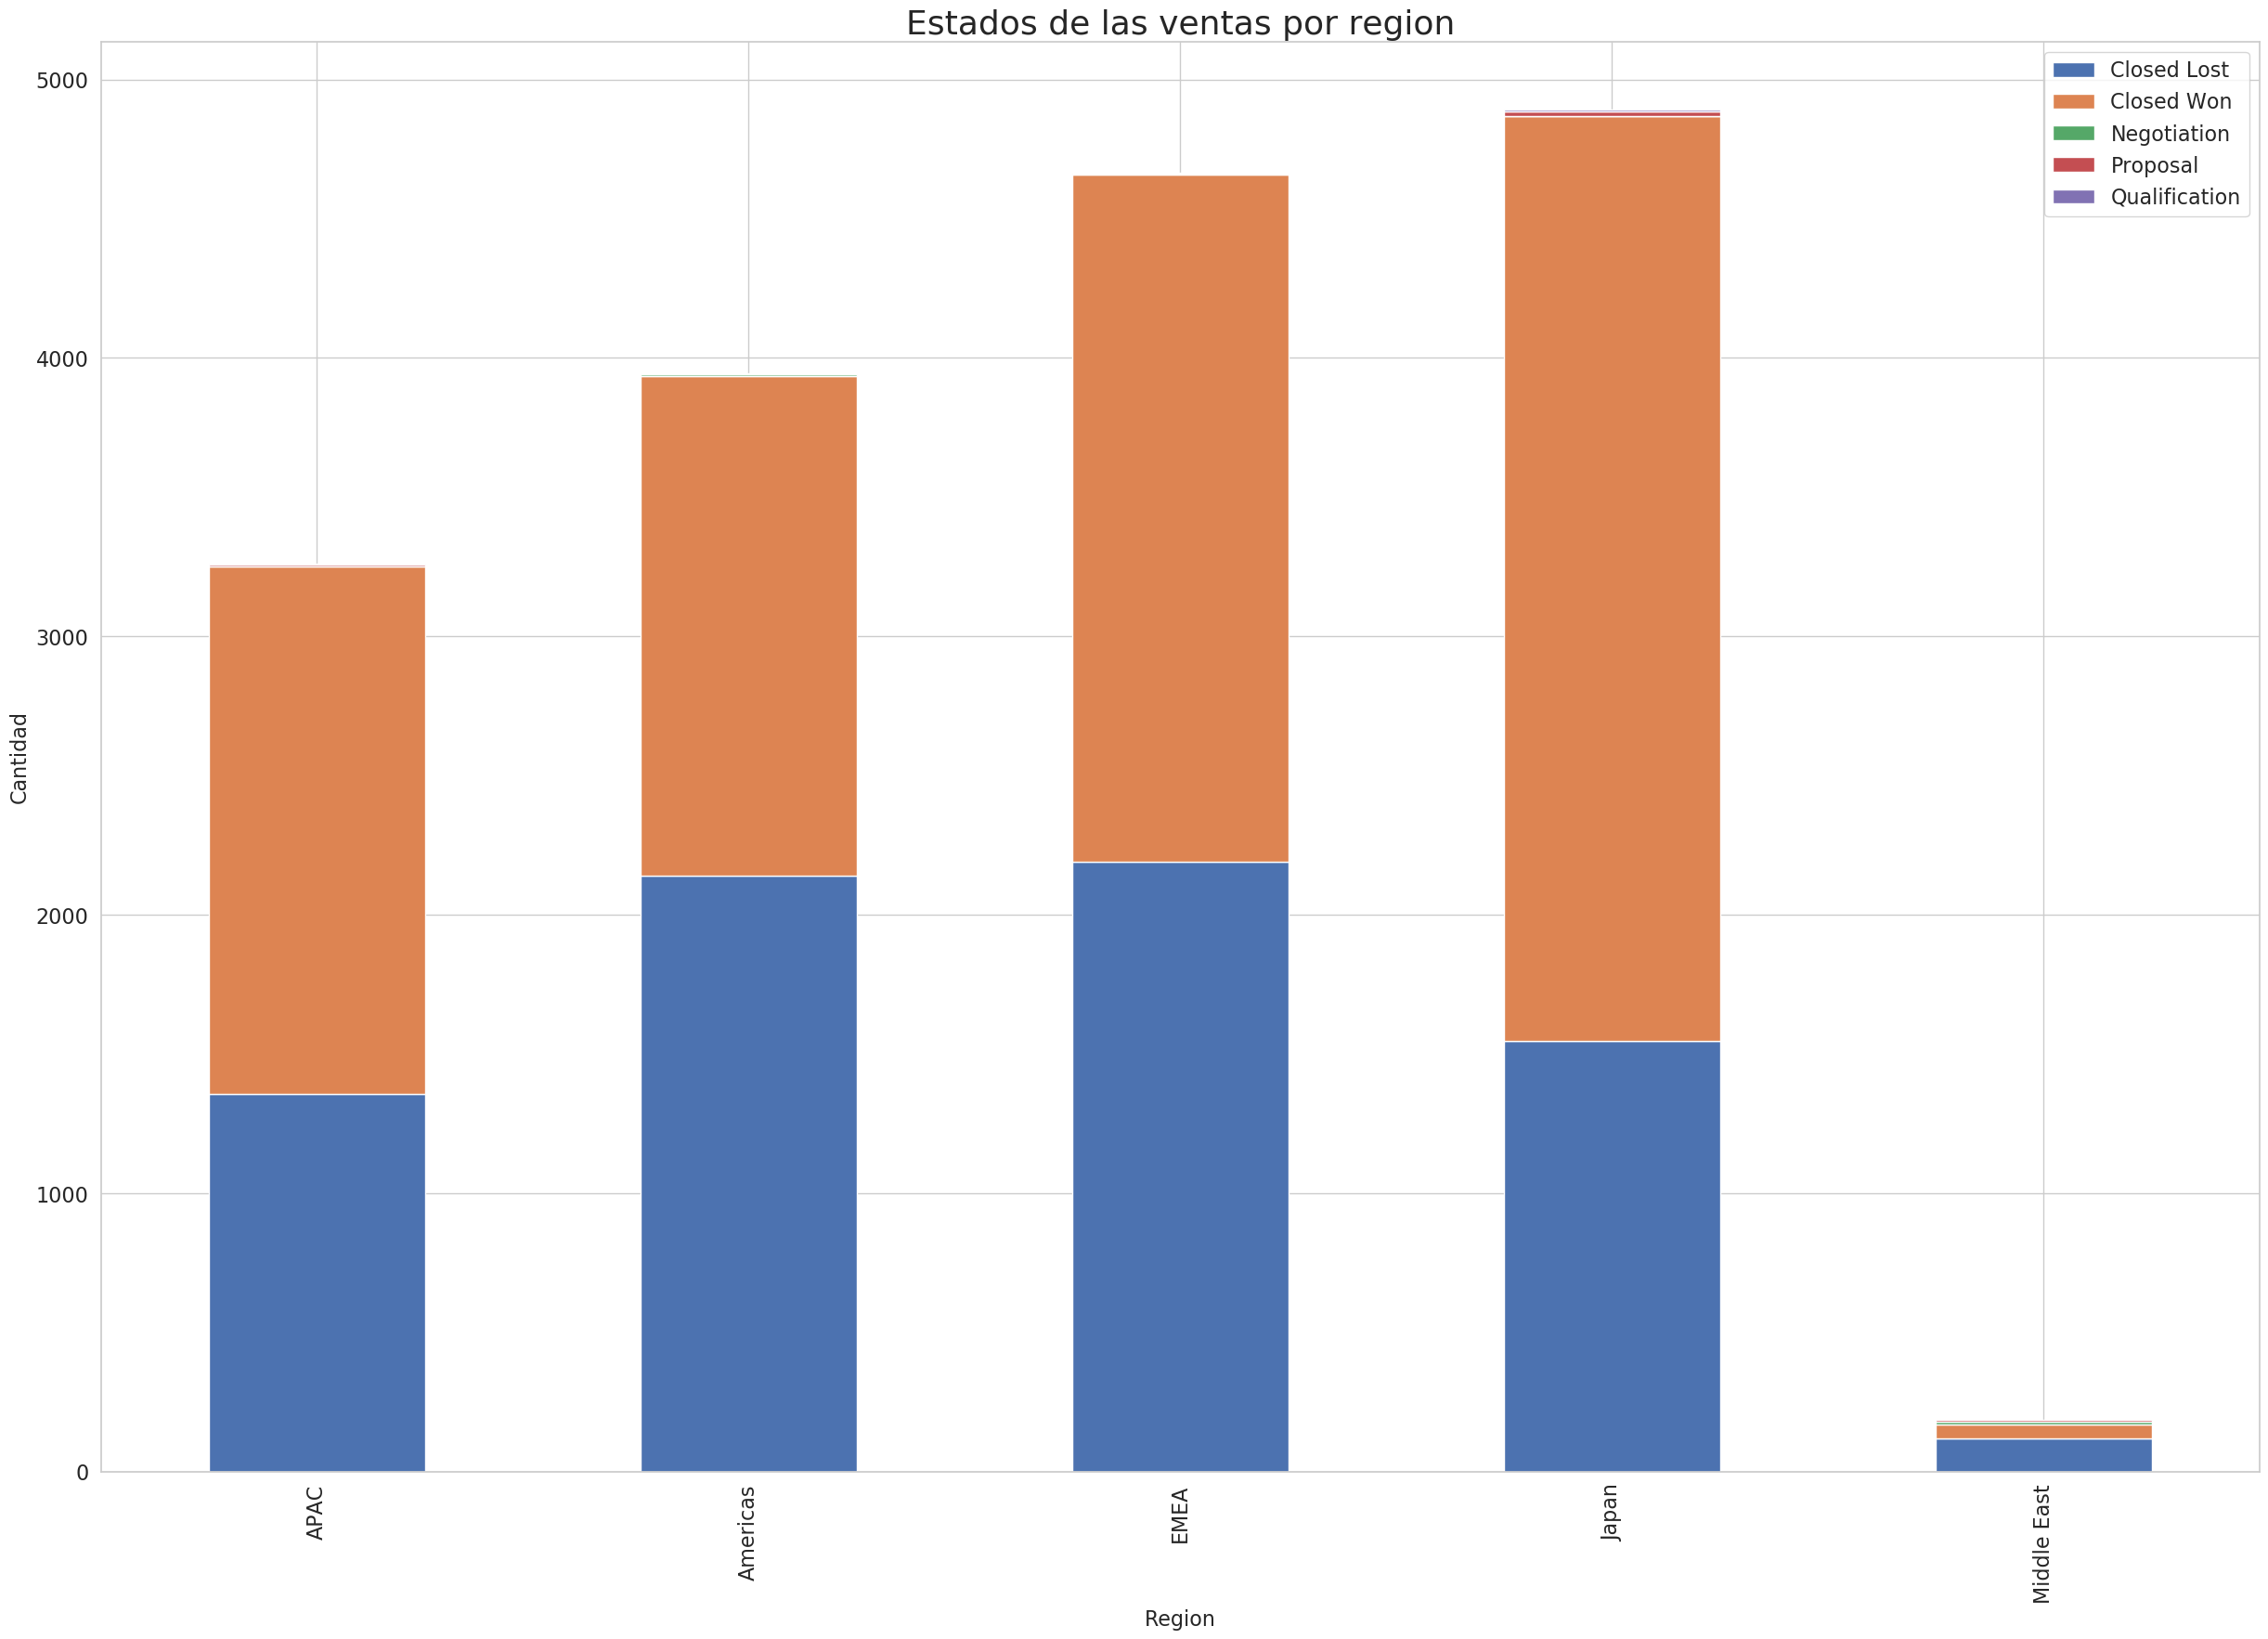

In [223]:
ax = stage.plot(kind="bar", stacked=True, fontsize= 16, figsize=(30, 20))
plt.title('Estados de las ventas por region', fontsize=26)
plt.xlabel("Region", fontsize= 16)
plt.ylabel("Cantidad", fontsize= 16)
plt.legend(fontsize=16) #habria que corregir los numeros

In [224]:
## https://seaborn.pydata.org/generated/seaborn.boxplot.html
#g = sns.boxplot(x="Region", y="cantidad",data=stage, palette="hls")
#g.set_title("Ventas exitosas por region", fontsize=18)
#g.set_xlabel("Region", fontsize=14)
#g.set_ylabel("Ventas exitosas", fontsize=14)

## Analisis del territorio

Deescripción : territorio comercial de la oportunidad 

Text(0, 0.5, 'Cantidad de apariciones')

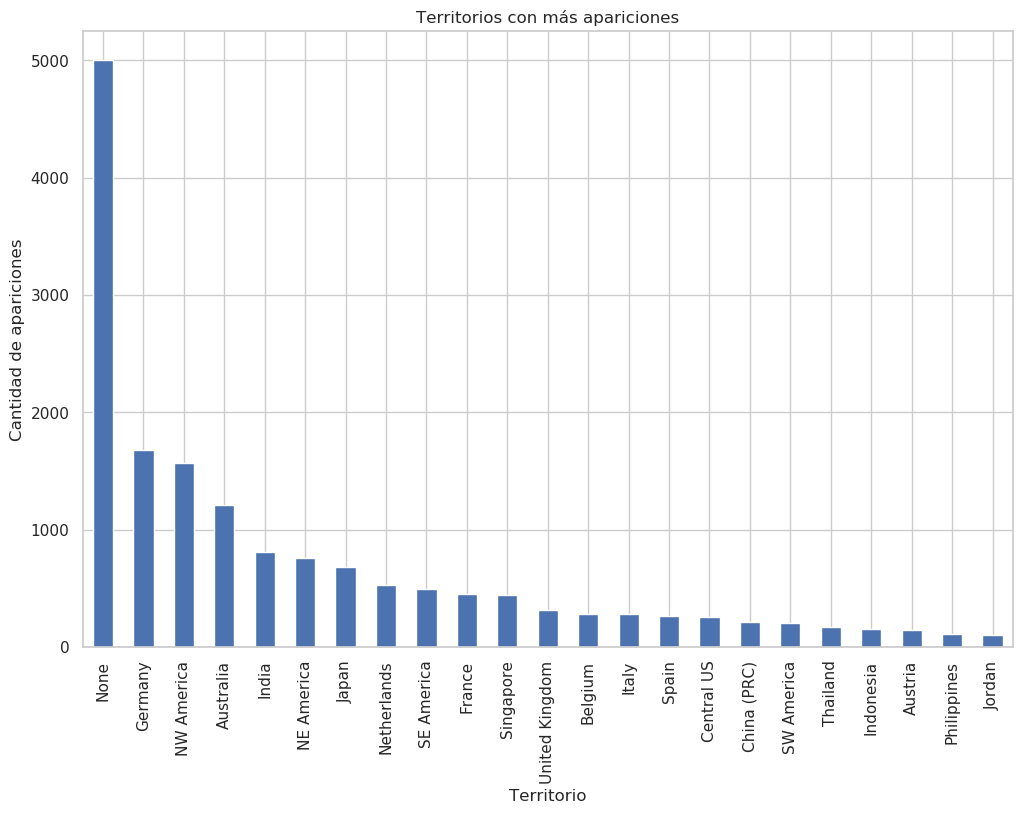

In [225]:
territory = pd.DataFrame(df['Territory'].value_counts())
territory.columns = ['cantidad']

territory_filtradas = territory.loc[(territory.cantidad > 100)] #Numero a elección
territory_filtradas["cantidad"].plot(kind="bar",title = 'Territorios con más apariciones' , figsize=(12,8))
plt.xlabel('Territorio', fontsize= 12)
plt.ylabel("Cantidad de apariciones", fontsize= 12)

Hay demasiados con 'None', hacemos lo mismo pero le quitamos ese valor.

Text(0, 0.5, 'Cantidad de apariciones')

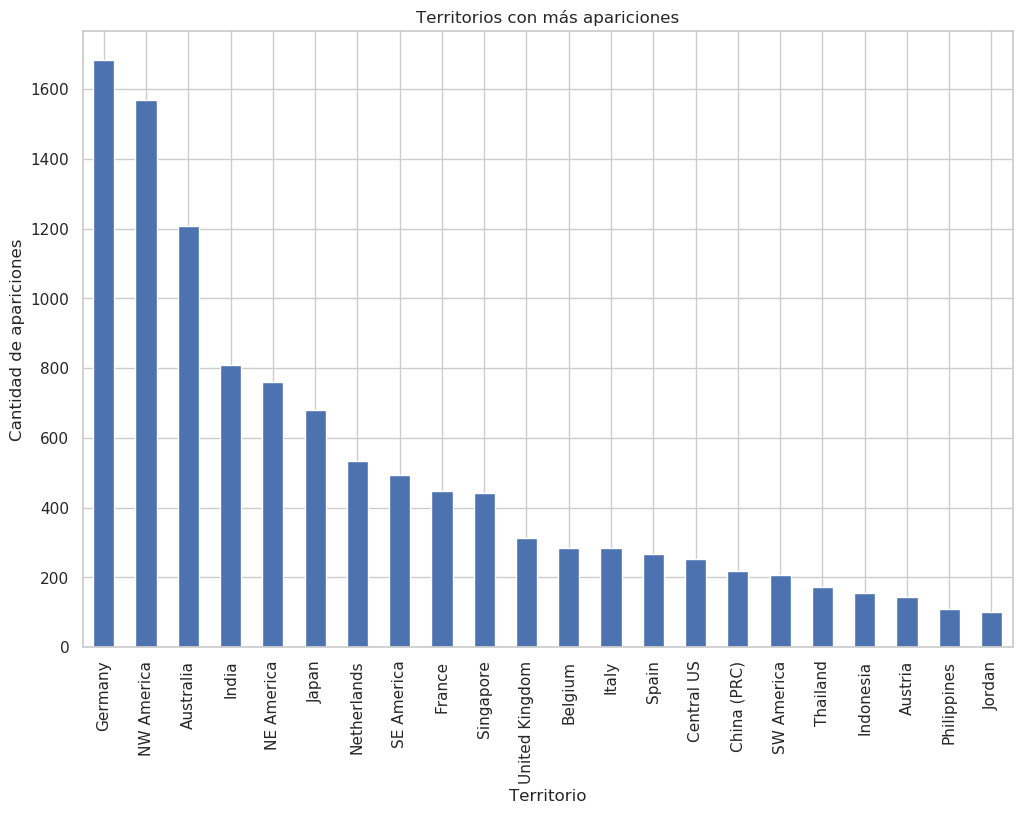

In [226]:
territory_filtradas = territory.loc[(territory.cantidad > 100) & (territory.cantidad < 4000)] #Numero a elección
territory_filtradas["cantidad"].plot(kind="bar",title = 'Territorios con más apariciones' , figsize=(12,8))
plt.xlabel('Territorio', fontsize= 12)
plt.ylabel("Cantidad de apariciones", fontsize= 12)


Descripción y analisis

In [227]:
#territory_filtradas = territory.loc[(territory.cantidad > 100) & (territory.cantidad < 4000)] #Numero a elección
#ter = df.loc[df.territory is in territory_filtradas]
#ter = ter.groupby(['territory','Stage']).agg({'Stage': 'count'})
#ter.columns = ['cantidad']
#ter = ter.reset_index()
#ter = ter.pivot(index='Territory',columns='Stage',values='cantidad')
#ter.fillna(value=0, inplace=True)
#ter

## Analisis de territorios con mayor cantidad de ventas (creo)

In [228]:
aux = df.loc[df.Territory != 'None']
df_territory = aux.groupby('Territory')['Total_Amount'].agg(['count','mean'])
df_territory.columns = ['count_Total_Amount','mean_Total_Amount']
df_territory.nlargest(15,'mean_Total_Amount')
#KSA = Arabia Saudita

,count_Total_Amount,mean_Total_Amount
Territory,,
Romania,2,"32,418,990.00"
Kazakhstan,7,"23,324,239.18"
Japan,679,"14,113,813.01"
Armenia,2,"9,697,182.00"
Solomon Islands,1,"8,467,149.60"
KSA,13,"6,609,891.45"
Malaysia,5,"5,863,641.33"
UAE (Dubai),31,"5,811,978.26"
South America,9,"5,354,891.81"


In [229]:
aux = df.loc[(df.Territory != 'None') & (df.Stage == 'Closed Won')]
df_territory = aux.groupby('Territory')['Total_Amount'].agg(['count','mean'])
df_territory.columns = ['count_Total_Amount','mean_Total_Amount']
df_territory.nlargest(15,'mean_Total_Amount')

,count_Total_Amount,mean_Total_Amount
Territory,,
Japan,546,"6,651,154.39"
Turkey,7,"4,328,910.00"
Saudi Arabia,1,"675,481.60"
SE America,187,"569,391.58"
Slovenia,1,"553,162.50"
Taiwan,9,"549,002.38"
United Kingdom,122,"486,706.72"
NW America,973,"422,784.04"
UAE (Others),2,"376,986.05"


In [230]:
aux = df.loc[(df.Territory != 'None') & (df.Stage == 'Closed Lost')]
df_territory = aux.groupby('Territory')['Total_Amount'].agg(['count','mean'])
df_territory.columns = ['count_Total_Amount','mean_Total_Amount']
df_territory.nlargest(15,'mean_Total_Amount')

,count_Total_Amount,mean_Total_Amount
Territory,,
Romania,2,"32,418,990.00"
Japan,128,"31,970,613.41"
Kazakhstan,7,"23,324,239.18"
KSA,7,"12,221,383.75"
Armenia,2,"9,697,182.00"
Solomon Islands,1,"8,467,149.60"
Vietnam,28,"7,641,245.51"
UAE (Dubai),26,"6,879,287.64"
SE America,301,"6,475,181.29"


## Analisis del país donde se emite la factura

Descripción

Text(0, 0.5, 'Cantidad de apariciones')

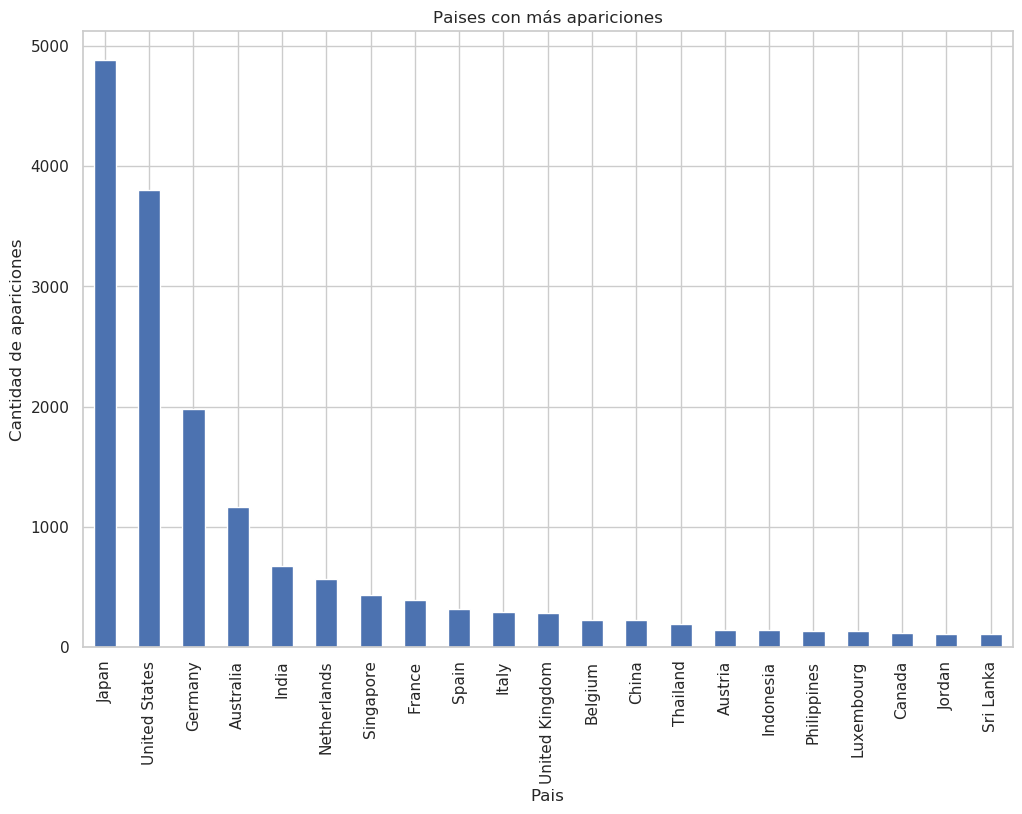

In [231]:
#df['Billing_Country'].value_counts()

country = pd.DataFrame(df['Billing_Country'].value_counts())
country.columns = ['cantidad']

country_filtradas = country.loc[(country.cantidad > 100)] #Numero a elección
country_filtradas["cantidad"].plot(kind="bar",title = 'Paises con más apariciones' , figsize=(12,8))
plt.xlabel('Pais', fontsize= 12)
plt.ylabel("Cantidad de apariciones", fontsize= 12)

In [232]:
#df = df['Account_Created_Date'].astype()

columna = pd.to_datetime(df['Account_Created_Date'],dayfirst = True)
df['Account_Created_Date'] = columna
df.loc[df.Account_Created_Date > '2018-12-20']#.value_counts()

#fecha más antigua : '2013-03-10'
#fecha más reciente : '2018-12-20'

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
16093,9907,APAC,Indonesia,1,1,1,1,0,Bureaucratic_Code_4,2018-12-21,...,Q2,2019,NaT,1,USD,"279,986.00",USD,0.00,Proposal,Prod_Category_A_None


In [233]:
df['Opportunity_Created_Date'].value_counts()

6/30/2017     124
1/22/2016     107
5/9/2017      104
5/18/2016      99
1/7/2016       89
1/30/2018      87
10/2/2017      86
4/20/2017      83
12/6/2017      82
3/15/2017      80
10/24/2017     80
5/15/2017      77
2/15/2016      76
1/6/2016       74
5/2/2017       73
12/8/2017      72
5/4/2018       72
11/9/2017      69
12/12/2016     69
7/12/2016      68
12/13/2017     65
7/8/2017       65
6/29/2017      64
2/1/2018       64
4/7/2016       63
12/6/2016      62
9/7/2017       60
1/4/2018       60
3/10/2016      60
11/15/2017     59
             ... 
5/12/2018       1
3/27/2015       1
8/27/2017       1
10/6/2014       1
11/19/2017      1
5/19/2014       1
12/11/2018      1
4/22/2018       1
3/28/2015       1
12/10/2014      1
3/2/2015        1
7/15/2018       1
8/27/2015       1
2/1/2016        1
10/3/2015       1
8/5/2014        1
12/10/2017      1
7/16/2016       1
7/16/2017       1
7/23/2015       1
8/15/2015       1
1/21/2017       1
10/8/2017       1
4/13/2016       1
7/20/2015 

In [234]:
df['Quote_Type'].value_counts()

Non Binding    16777
Binding          170
Name: Quote_Type, dtype: int64

In [235]:
df['Account_Owner'].value_counts()

Person_Name_50    3730
Person_Name_13    1328
Person_Name_8     1286
Person_Name_43    1241
Person_Name_18    1093
Person_Name_3      875
Person_Name_32     682
Person_Name_4      664
Person_Name_65     631
Person_Name_64     577
Person_Name_16     439
Person_Name_46     381
Person_Name_45     357
Person_Name_2      333
Person_Name_38     326
Person_Name_42     304
Person_Name_66     258
Person_Name_60     227
Person_Name_49     201
Person_Name_59     201
Person_Name_62     179
Person_Name_54     178
Person_Name_52     172
Person_Name_5      166
Person_Name_21     166
Person_Name_63     138
Person_Name_55     138
Person_Name_51     108
Person_Name_39     104
Person_Name_33      86
Person_Name_14      74
Person_Name_61      72
Person_Name_44      57
Person_Name_41      51
Person_Name_9       50
Person_Name_58      15
Person_Name_26      12
Person_Name_11      10
Person_Name_29       8
Person_Name_36       7
Person_Name_25       7
Person_Name_23       4
Person_Name_34       3
Person_Name

In [236]:
df['Brand'].value_counts()

None        15911
Other         607
Brand_9       140
Brand_5        48
Brand_24       38
Brand_11       34
Brand_25       24
Brand_10       22
Brand_22       20
Brand_21       17
Brand_13       17
Brand_7        17
Brand_20       10
Brand_23       10
Brand_17        5
Brand_27        5
Brand_0         4
Brand_4         4
Brand_2         4
Brand_12        3
Brand_16        2
Brand_1         1
Brand_3         1
Brand_26        1
Brand_6         1
Brand_19        1
Name: Brand, dtype: int64

In [237]:
df['Size'].value_counts()

None      15967
Other       394
Size_3      356
Size_4      196
Size_1       25
Size_0        7
Size_2        2
Name: Size, dtype: int64

In [238]:
df['Price'].value_counts()

None     15982
Other      609
0.24        27
0.41        22
0.28        20
0.27        18
0.29        17
0.32        15
0.35        14
0.38        14
0.23        13
0.33        12
0.42        12
0.34        11
0.26        11
0.3         11
0.31        10
0.245        8
0.305        7
0.25         7
0.225        6
0.39         6
0.47         6
0.22         6
0.45         6
0.325        6
0.335        6
0.2          5
0.275        4
0.36         4
0.445        4
0.37         4
0.285        4
0.255        3
0.355        3
0.295        3
0.265        3
0.4          2
0.235        2
0.375        2
0.215        2
0.52         2
0.48         2
0.44         2
0.505        2
0.315        2
0.345        2
0.56         2
0.49         2
0.21         1
0.55         1
0.465        1
0.365        1
Name: Price, dtype: int64

In [239]:
df['Currency'].value_counts()

None    16052
EUR       475
USD       420
Name: Currency, dtype: int64

In [240]:
df['Last_Activity'].value_counts() #columna vacia?

NaT    16947
Name: Last_Activity, dtype: int64

In [241]:
df['Quote_Expiry_Date'].value_counts()

NaT           4625
6/30/2017      436
3/31/2017      363
9/30/2017      225
12/31/2016     200
10/31/2017     171
1/31/2018      163
11/30/2017     156
12/31/2017     156
5/31/2017      153
8/31/2017      145
7/31/2017      139
5/31/2018      115
9/30/2016      111
7/31/2018      103
6/30/2016      102
11/30/2018     102
8/31/2018       92
4/30/2018       92
4/28/2017       90
6/29/2018       82
3/31/2016       77
2/28/2018       76
11/30/2016      74
10/31/2018      72
3/30/2018       68
12/31/2018      62
10/31/2016      62
11/10/2017      61
12/15/2017      60
              ... 
9/4/2016         1
1/4/2019         1
2/16/2016        1
4/6/2016         1
7/1/2015         1
8/13/2016        1
2/13/2016        1
6/10/2018        1
9/29/2018        1
1/11/2019        1
7/10/2016        1
5/29/2018        1
2/17/2018        1
9/30/2014        1
7/17/2018        1
8/21/2018        1
12/25/2017       1
9/3/2017         1
3/6/2016         1
4/18/2017        1
2/15/2015        1
12/26/2018  

In [242]:
df['Actual_Delivery_Date'].value_counts() #vacia

NaT    16947
Name: Actual_Delivery_Date, dtype: int64

In [243]:
df['TRF'].value_counts()

0      11971
1       2192
2        627
3        354
5        297
4        208
10       190
6        131
7        111
20        83
11        58
8         54
12        48
30        43
13        40
25        38
15        35
9         31
14        30
17        29
19        25
50        22
28        19
18        19
60        17
40        17
23        12
35        12
26        11
27        10
       ...  
94         2
52         2
68         2
102        2
87         1
81         1
429        1
61         1
69         1
96         1
128        1
160        1
250        1
122        1
270        1
500        1
105        1
103        1
73         1
111        1
132        1
39         1
84         1
98         1
248        1
51         1
167        1
163        1
195        1
165        1
Name: TRF, Length: 101, dtype: int64

In [244]:
df['Sales_Contract_No'].value_counts()

None    6973
108       36
479       36
2575      18
5583      16
3123      16
3980      16
3877      16
3878      16
3876      16
4526      14
3474      14
2958      13
1673      13
3900      12
3186      12
4022      12
3339      11
2280      11
3802      11
43        11
32        10
3956      10
243       10
990       10
1660      10
376       10
1515      10
946       10
4024      10
        ... 
3708       1
937        1
4826       1
2946       1
767        1
1214       1
1696       1
5409       1
200        1
3220       1
5397       1
2440       1
2610       1
5429       1
465        1
2962       1
5379       1
3996       1
1733       1
2061       1
5393       1
3989       1
3576       1
3322       1
2603       1
1929       1
5096       1
4407       1
39         1
1765       1
Name: Sales_Contract_No, Length: 5267, dtype: int64

In [245]:
aux = df.groupby(['Size','Price']).agg({'Size': 'count'})
aux.columns = ['cantidad']
aux

cantidad
Size   Price          
None   0.36          1
       None      15964
       Other         2
Other  0.2           1
       0.23          5
       0.28          2
       0.31          1
       0.33          1
       0.34          2
       0.35          2
       0.355         1
       0.36          1
       0.37          1
       0.38          1
       0.39          2
       0.56          2
       None          3
       Other       369
Size_0 0.28          3
       0.285         1
       0.375         1
       Other         2
Size_1 0.26          1
       0.27          1
       0.31          1
       0.35          1
       0.355         1
       0.49          2
       0.505         2
       Other        16
...                ...
Size_4 0.28          2
       0.285         1
       0.29          6
       0.3           5
       0.305         1
       0.31          1
       0.315         2
       0.32          4
       0.325         2
       0.33          3
       0.34          2
       0.345         1
       0.35          6
       0.36          1
       0.37          1
       0.375         1
       0.38         11
       0.39          3
       0.4           1
       0.41         22
       0.42         10
       0.44          1
       0.445         4
       0.45          3
       0.465         1
       0.47          4
       0.48          2
       0.55          1
       None         12
       Other        64

[113 rows x 1 columns]

In [246]:
aux = df.groupby(['TRF','Price']).agg({'Stage': 'count'})
aux.columns = ['cantidad']
aux

cantidad
TRF Price          
0   0.235         1
    0.24          7
    0.245         3
    0.25          2
    0.26          3
    0.265         1
    0.27          7
    0.275         2
    0.28          6
    0.285         1
    0.295         1
    0.3           3
    0.305         1
    0.31          4
    0.32         11
    0.325         4
    0.33          4
    0.335         3
    0.34          4
    0.345         1
    0.35          7
    0.36          2
    0.365         1
    0.37          2
    0.38          6
    0.39          4
    0.41          5
    0.42          4
    0.445         2
    0.45          4
...             ...
94  Other         2
96  None          1
98  None          1
100 None          4
    Other         2
102 None          2
103 None          1
104 None          2
105 None          1
111 None          1
120 None          7
    Other         2
122 None          1
125 Other         4
128 None          1
132 None          1
150 None          5
160 None          1
163 None          1
165 None          1
167 None          1
175 None          2
180 None          3
195 0.38          1
248 None          1
250 None          1
270 0.38          1
400 None          2
429 None          1
500 None          1

[286 rows x 1 columns]

In [247]:
df['ASP']

0                       0.52
1                       0.53
2                       0.48
3                       0.53
4                       0.53
5                       0.53
6                       0.38
7                       0.48
8                        nan
9                        nan
10                       nan
11                       nan
12                     78.00
13                       nan
14                       nan
15                       nan
16                       nan
17                     78.00
18                       nan
19                       nan
20                       nan
21                       nan
22                     78.00
23                      0.54
24                      0.55
25                       nan
26                       nan
27                       nan
28                       nan
29                       nan
                ...         
16917                    nan
16918                    nan
16919                  78.00
16920         